## 1. Instalación y carga de librerías

In [48]:
!pip install nltk wordcloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import re
from colorama import Fore
import requests


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to C:\Users\ROG BY
[nltk_data]     NG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\ROG BY
[nltk_data]     NG\AppData\Roaming\nltk_data...


[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ROG BY
[nltk_data]     NG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from datetime import datetime

# Configurar Selenium con Chrome (modo headless)
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Base URL
base_url = "https://www.trustpilot.com/review/www.airbnb.com?page="

reviews = []

# Scrapear 5 páginas (podés cambiar a 66)
for page in range(1, 66):
    print(f"📥 Bajando página {page}...")
    driver.get(base_url + str(page))
    time.sleep(3)

    # Extraer comentarios
    comentarios = driver.find_elements(By.CSS_SELECTOR, "p[data-service-review-text-typography]")

    # Extraer fechas
    fechas = driver.find_elements(By.TAG_NAME, "time")

    # Extraer estrellas (del atributo data-service-review-rating)
    estrellas_raw = driver.find_elements(By.CSS_SELECTOR, "div[data-service-review-rating]")

    for comentario, fecha, estrella in zip(comentarios, fechas, estrellas_raw):
        # Fecha
        fecha_iso = fecha.get_attribute("datetime")
        if fecha_iso:
            fecha_dt = datetime.fromisoformat(fecha_iso.replace("Z", "+00:00"))
            fecha_formateada = fecha_dt.strftime("%d/%m/%Y")
        else:
            fecha_formateada, fecha_dt = "N/A", None

        # Estrellas
        estrellas_valor = estrella.get_attribute("data-service-review-rating")
        estrellas_final = f"{estrellas_valor}/5" if estrellas_valor else None

        reviews.append({
            "fecha": fecha_formateada,
            "fecha_dt": fecha_dt,  # se usa solo para ordenar
            "comentario": comentario.text.strip(),
            "estrellas": estrellas_final
        })

# Cerrar navegador
driver.quit()

# Crear DataFrame
df = pd.DataFrame(reviews)

# Ordenar por fecha (más reciente primero)
df = df.sort_values(by="fecha_dt", ascending=False).reset_index(drop=True)

# Dropear fecha_dt antes de guardar
df = df.drop(columns=["fecha_dt"])

# Guardar CSV limpio
df.to_csv("comentarios_airbnb_ordenado.csv", index=False, encoding="utf-8")

print("✅ Listo! Se guardaron", len(df), "comentarios en 'comentarios_airbnb_ordenado.csv'")

# Mostrar primeras filas
df


📥 Bajando página 1...
📥 Bajando página 2...
📥 Bajando página 3...
📥 Bajando página 4...
📥 Bajando página 5...
📥 Bajando página 6...
📥 Bajando página 7...
📥 Bajando página 8...
📥 Bajando página 9...
📥 Bajando página 10...
📥 Bajando página 11...
📥 Bajando página 12...
📥 Bajando página 13...
📥 Bajando página 14...
📥 Bajando página 15...
📥 Bajando página 16...
📥 Bajando página 17...
📥 Bajando página 18...
📥 Bajando página 19...
📥 Bajando página 20...
📥 Bajando página 21...
📥 Bajando página 22...
📥 Bajando página 23...
📥 Bajando página 24...
📥 Bajando página 25...
📥 Bajando página 26...
📥 Bajando página 27...
📥 Bajando página 28...
📥 Bajando página 29...
📥 Bajando página 30...
📥 Bajando página 31...
📥 Bajando página 32...
📥 Bajando página 33...
📥 Bajando página 34...
📥 Bajando página 35...
📥 Bajando página 36...
📥 Bajando página 37...
📥 Bajando página 38...
📥 Bajando página 39...
📥 Bajando página 40...
📥 Bajando página 41...
📥 Bajando página 42...
📥 Bajando página 43...
📥 Bajando página 44.

,fecha,comentario,estrellas
0,31/08/2025,Just the biggest scam of the century compared ...,1/5
1,31/08/2025,Airbnb is a great platform that deserves 5 sta...,1/5
2,31/08/2025,Tried to book simple 3 night stay only to be c...,1/5
3,31/08/2025,I am deeply disappointed with Airbnb’s handlin...,1/5
4,31/08/2025,"Have tried multiple times to book an Airbnb, r...",1/5
...,...,...,...
1284,26/12/2024,Came to check in to my cabin evening of 23rd o...,1/5
1285,26/12/2024,As someone with 49 stays in Airbnb I was final...,1/5
1286,26/12/2024,Be careful if you are an Airbnb host you can g...,1/5
1287,26/12/2024,Doesnt deserve any star\nBooked an apartment v...,1/5


## 3. Tokenización


In [50]:
from nltk.tokenize import word_tokenize

# Crear columna de tokens
df['tokens'] = df['comentario'].apply(word_tokenize)

# Quedarnos solo con las columnas que te interesan
df_limpio = df[['fecha', 'comentario', 'tokens', 'estrellas']]

# Guardar CSV limpio
df_limpio.to_csv("comentarios_airbnb_tokenizado.csv", index=False, encoding="utf-8")

#mostrar df
df


,fecha,comentario,estrellas,tokens
0,31/08/2025,Just the biggest scam of the century compared ...,1/5,"[Just, the, biggest, scam, of, the, century, c..."
1,31/08/2025,Airbnb is a great platform that deserves 5 sta...,1/5,"[Airbnb, is, a, great, platform, that, deserve..."
2,31/08/2025,Tried to book simple 3 night stay only to be c...,1/5,"[Tried, to, book, simple, 3, night, stay, only..."
3,31/08/2025,I am deeply disappointed with Airbnb’s handlin...,1/5,"[I, am, deeply, disappointed, with, Airbnb, ’,..."
4,31/08/2025,"Have tried multiple times to book an Airbnb, r...",1/5,"[Have, tried, multiple, times, to, book, an, A..."
...,...,...,...,...
1284,26/12/2024,Came to check in to my cabin evening of 23rd o...,1/5,"[Came, to, check, in, to, my, cabin, evening, ..."
1285,26/12/2024,As someone with 49 stays in Airbnb I was final...,1/5,"[As, someone, with, 49, stays, in, Airbnb, I, ..."
1286,26/12/2024,Be careful if you are an Airbnb host you can g...,1/5,"[Be, careful, if, you, are, an, Airbnb, host, ..."
1287,26/12/2024,Doesnt deserve any star\nBooked an apartment v...,1/5,"[Doesnt, deserve, any, star, Booked, an, apart..."


## 4. Eliminación de stopwords
Quitamos palabras vacías que no aportan mucho significado.

In [51]:
from nltk.corpus import stopwords

# Definir stopwords en inglés (o español si tus reviews están en español)
stop_words = set(stopwords.words('english'))

# Crear tokens limpios (sin stopwords, solo palabras alfabéticas)
df['tokens_clean'] = df['tokens'].apply(
    lambda tokens: [w.lower() for w in tokens if w.lower() not in stop_words and w.isalpha()]
)

# Reordenar columnas para que se vea prolijo
df_limpio = df[['fecha', 'comentario', 'estrellas', 'tokens', 'tokens_clean']]

# Guardar CSV
df_limpio.to_csv("comentarios_airbnb_tokenizado_stopwords.csv", index=False, encoding="utf-8")

#mostrar df
df


,fecha,comentario,estrellas,tokens,tokens_clean
0,31/08/2025,Just the biggest scam of the century compared ...,1/5,"[Just, the, biggest, scam, of, the, century, c...","[biggest, scam, century, compared, compared, b..."
1,31/08/2025,Airbnb is a great platform that deserves 5 sta...,1/5,"[Airbnb, is, a, great, platform, that, deserve...","[airbnb, great, platform, deserves, stars, sup..."
2,31/08/2025,Tried to book simple 3 night stay only to be c...,1/5,"[Tried, to, book, simple, 3, night, stay, only...","[tried, book, simple, night, stay, confronted,..."
3,31/08/2025,I am deeply disappointed with Airbnb’s handlin...,1/5,"[I, am, deeply, disappointed, with, Airbnb, ’,...","[deeply, disappointed, airbnb, handling, promi..."
4,31/08/2025,"Have tried multiple times to book an Airbnb, r...",1/5,"[Have, tried, multiple, times, to, book, an, A...","[tried, multiple, times, book, airbnb, ranging..."
...,...,...,...,...,...
1284,26/12/2024,Came to check in to my cabin evening of 23rd o...,1/5,"[Came, to, check, in, to, my, cabin, evening, ...","[came, check, cabin, evening, december, find, ..."
1285,26/12/2024,As someone with 49 stays in Airbnb I was final...,1/5,"[As, someone, with, 49, stays, in, Airbnb, I, ...","[someone, stays, airbnb, finally, scammed, hos..."
1286,26/12/2024,Be careful if you are an Airbnb host you can g...,1/5,"[Be, careful, if, you, are, an, Airbnb, host, ...","[careful, airbnb, host, get, robbed, guest, ca..."
1287,26/12/2024,Doesnt deserve any star\nBooked an apartment v...,1/5,"[Doesnt, deserve, any, star, Booked, an, apart...","[doesnt, deserve, star, booked, apartment, via..."


## 5. Frecuencias de palabras

In [53]:
from collections import Counter

# Unir todos los tokens limpios en una sola lista
all_tokens = [token for tokens in df['tokens_clean'] for token in tokens]

# Contar la frecuencia de cada palabra
word_freq = Counter(all_tokens)

# Mostrar las 20 palabras más comunes
# Pasamos a DataFrame para verlo más lindo
freq_df = pd.DataFrame(word_freq.most_common(20), columns=["Palabra", "Frecuencia"])
print(freq_df)



       Palabra  Frecuencia
0       airbnb        3044
1         host        1371
2       review         517
3      support         508
4         even         487
5      booking         461
6       refund         460
7        would         451
8         stay         450
9     property         426
10    customer         405
11     service         399
12       hosts         392
13          us         373
14       never         364
15        time         361
16         one         361
17       guest         361
18  experience         358
19      guests         348


## 6. Nube de palabras de todos los comentarios

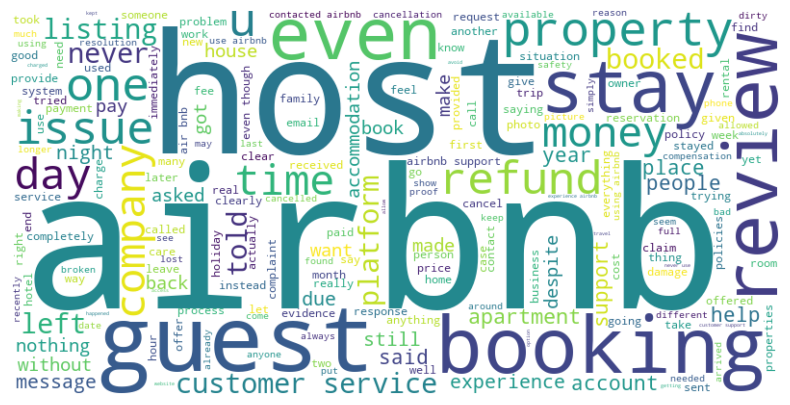

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todos los tokens en un string gigante
all_tokens = [token for tokens in df['tokens_clean'] for token in tokens]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 7 . Nube de palabras por estrellas

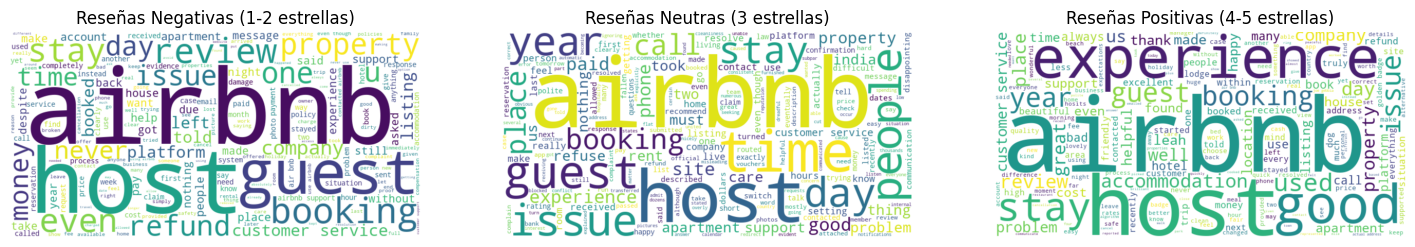

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokens negativos (1 y 2 estrellas)
tokens_negativos = [token for tokens in df[df['estrellas'].isin(['1/5', '2/5'])]['tokens_clean'] for token in tokens]
wc_neg = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_negativos))

# Tokens neutros (3 estrellas)
tokens_neutros = [token for tokens in df[df['estrellas'].isin(['3/5'])]['tokens_clean'] for token in tokens]
wc_neu = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_neutros))

# Tokens positivos (4 y 5 estrellas)
tokens_positivos = [token for tokens in df[df['estrellas'].isin(['4/5', '5/5'])]['tokens_clean'] for token in tokens]
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_positivos))

# Mostrar en 3 columnas
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.title("Reseñas Negativas (1-2 estrellas)")
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Reseñas Neutras (3 estrellas)")
plt.imshow(wc_neu, interpolation='bilinear')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Reseñas Positivas (4-5 estrellas)")
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')

plt.show()


## 8. cuántas reseñas hay en cada categoría de estrellas y qué porcentaje

📊 KPIs de Reseñas por Estrellas:
           Cantidad  Porcentaje (%)
estrellas                          
1/5            1174           91.08
2/5              50            3.88
3/5              12            0.93
4/5              15            1.16
5/5              38            2.95


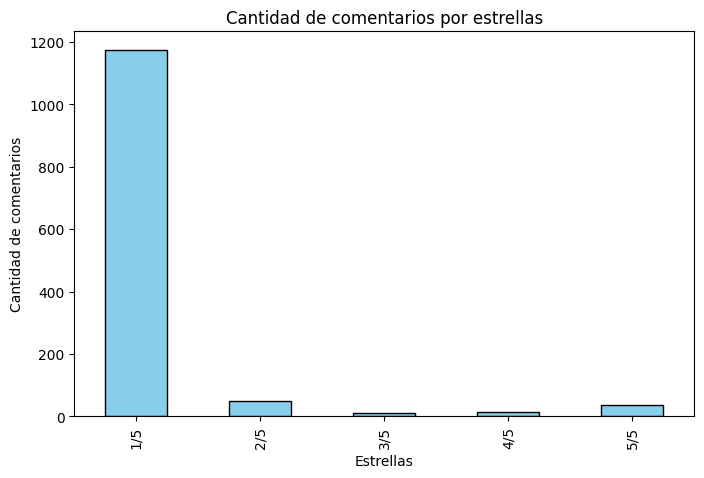

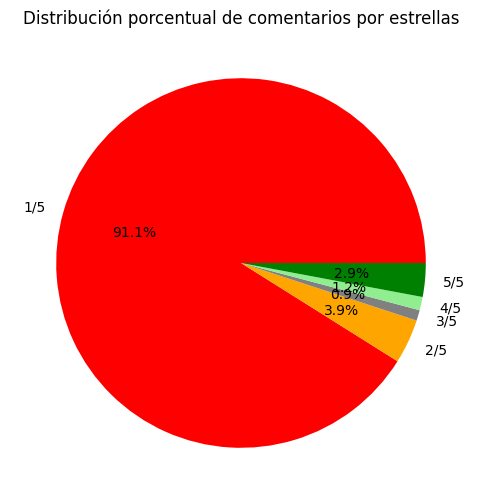

In [68]:
import matplotlib.pyplot as plt

# Contar cantidad de comentarios por estrella
conteo_estrellas = df['estrellas'].value_counts().sort_index()

# Calcular porcentajes
porcentajes = (conteo_estrellas / conteo_estrellas.sum()) * 100

# Crear DataFrame resumen
kpis = pd.DataFrame({
    "Cantidad": conteo_estrellas,
    "Porcentaje (%)": porcentajes.round(2)
})

print("📊 KPIs de Reseñas por Estrellas:")
print(kpis)

# Visualización
plt.figure(figsize=(8,5))
conteo_estrellas.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Cantidad de comentarios por estrellas")
plt.xlabel("Estrellas")
plt.ylabel("Cantidad de comentarios")
plt.show()

plt.figure(figsize=(6,6))
plt.pie(conteo_estrellas, labels=conteo_estrellas.index, autopct="%1.1f%%", colors=["red","orange","gray","lightgreen","green"])
plt.title("Distribución porcentual de comentarios por estrellas")
plt.show()





## 9. Como evolucionaron los comentarios por estrellas, mes a mes de enero a agosto 2025

📊 Cantidad de comentarios por estrella y mes:
estrellas  1/5  2/5  3/5  4/5  5/5
mes                               
2025-01     76    2    0    2    3
2025-02     82    2    0    1    2
2025-03     98    4    3    1    2
2025-04     89    4    2    2    5
2025-05     99    7    4    1    5
2025-06    130    5    0    2    2
2025-07    186    8    0    3    4
2025-08    388   16    2    3   14


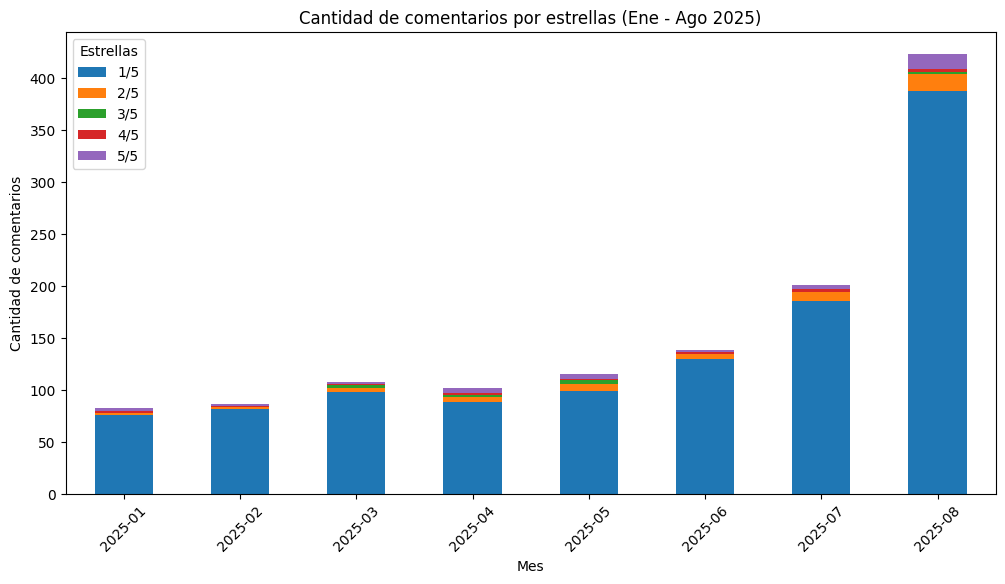

In [71]:

# Convertir la columna 'fecha' a datetime
df["fecha"] = pd.to_datetime(df["fecha"], format="%d/%m/%Y", errors="coerce")

# Crear columna de mes (ej: 2025-01, 2025-02, ...)
df["mes"] = df["fecha"].dt.to_period("M")

# Agrupar por mes y estrellas
resumen_mensual = df.groupby(["mes", "estrellas"]).size().unstack(fill_value=0)

# Filtrar solo de enero a agosto 2025
resumen_mensual = resumen_mensual.loc["2025-01":"2025-08"]

print("📊 Cantidad de comentarios por estrella y mes:")
print(resumen_mensual)

# 📈 Graficar barras apiladas
resumen_mensual.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Cantidad de comentarios por estrellas (Ene - Ago 2025)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de comentarios")
plt.legend(title="Estrellas")
plt.xticks(rotation=45)
plt.show()
